# Importações

In [20]:
import pandas as pd
import Orange
import matplotlib.pyplot as plt

# Funções

In [22]:
def gerar_diagrama(algoritmos, rankings_medio, num_datasets, path_fig):
    cd = Orange.evaluation.compute_CD(rankings_medio, num_datasets) 
    Orange.evaluation.graph_ranks(rankings_medio, algoritmos, cd=cd, width=6, textspace=1.5, filename=path_fig)
    plt.show()

In [23]:
def gerar_ranking(series): 
    return (len(series) + 1) - series.rank()

# Definições

In [80]:
path = '/media/rafael/DadosCompartilhados/experimentos/experimentos_marcio/ResultadosProcessados/MacroF1_GFHF_Máximo_top_50.csv'
num_datasets = 50
path_fig = './MacroF1_GFHF.png'
path_fig_top = './MacroF1_GFHF_top5.png'

# Processamento

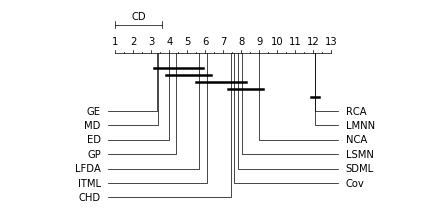

<Figure size 432x288 with 0 Axes>

In [81]:
# Gerando o diagram de diferenca crítica com todos os algoritmos
df = pd.read_csv(path, index_col=0)
df_ranking = df.apply(gerar_ranking, axis=1)
df_processamento = df_ranking.describe()
gerar_diagrama(df_processamento.columns, df_processamento.loc['mean'], num_datasets, path_fig)

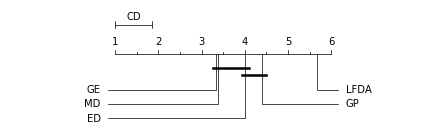

<Figure size 432x288 with 0 Axes>

In [82]:
# Gerando o diagram de diferenca crítica com os top-5 algoritmos
df_sorted = df_processamento.sort_values(by=['mean'], axis=1)
df_sorted = df_sorted[df_sorted.columns[:5]]
gerar_diagrama(df_sorted.columns, df_sorted.loc['mean'], num_datasets, path_fig_top)